# Columns Exploration 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/olegsargu/Downloads/Data-Collisions.csv')
df.head()

/Users/olegsargu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [241]:
print('Starting date: ', min(df['INCDTTM']))
print('Ending date: ', max(df['INCDTTM']))

Starting date:  1/1/2004
Ending date:  9/9/2019 9:27:00 AM


In [4]:
df.isnull().values.sum()

1100024

In [5]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df.shape

(194673, 38)

I am starting with a data set that has (194673, 38). There are numerous columns that provides redundant information nor presenting any statistical values or due to high amount of missing values will have to be dropped.

In [7]:
# https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
def getDuplicateColumns(df): 
  
    # Create an empty set 
    duplicateColumnNames = set() 
      
    # Iterate through all the columns of dataframe 
    for x in range(df.shape[1]): 
          
        # Take column at xth index. 
        col = df.iloc[:, x] 
          
        # Iterate through all the columns in DataFrame from (x + 1)th index to last index 
        for y in range(x + 1, df.shape[1]): 
              
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
              
            # Check if two columns at x & y index are equal or not, if equal then adding to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y]) 
                  
    # Return list of unique column names whose contents are duplicates. 
    return list(duplicateColumnNames) 
  
# Driver code 
if __name__ == "__main__" : 
  
  
    # Get list of duplicate columns 
    duplicateColNames = getDuplicateColumns(df) 
  
    print('Duplicate Columns are :') 
        
    # Iterate through duplicate column names 
    for column in duplicateColNames : 
       print('Column Name : ', column)

Duplicate Columns are :
Column Name :  SEVERITYCODE.1


Technicaly I identified one duplicate column that has to be dropped: 'SEVERITYCODE.1'

In [8]:
df['ST_COLDESC'].nunique()

62

In [9]:
df['SDOT_COLDESC'].nunique() 

39

In [10]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [11]:
df['ST_COLDESC'].value_counts()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Vehicle Strikes All Other Non-Domestic Animal                              2
Railway Vehicle Strikes Pedalcyclist                                       2
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Strikes Deer                                                       1
Vehicle Hits State Road or Construction Machinery                          1
Name: ST_COLDESC, Length: 62, dtype: int64

In [12]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Although columns 'ST_COLCODE' and 'ST_COLDESC' are different from 'SDOT_COLCODE' and 'SDOT_COLDESC', these columns contains similar information. Thus, 'ST_COLCODE' and 'ST_COLDESC' will be dropped. Even thought, 'ST_COLCODE' and 'ST_COLDESC' is more descriptive we will not loose any valuable information since 'SDOT_COLCODE' and 'SDOT_COLDESC' in tandem with other columns such as 'COLLISIONTYPE' provides similar information. In addition, SDOT_COLCODE and SDOT_COLDESC do not contain any missing values, while 'ST_COLCODE' and 'ST_COLDESC' registerred 18 and 4905 missing values.

Columns 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'SDOTCOLNUM'  do not provide any statistically relevant information for my further studies, thus these columns will be dropped.

Columns 'INCDATE' will be dropped since the same information can be found in the columns 'INCDDTM'.

Columns 'PEDROWNOTGRNT', 'INATTENTIONIND', 'EXCEPTRSNDESC', 'EXCEPTRSNCODE' will be dropped due to vast amount of missing data and/or irrelevant statistical information.

In [13]:
df['CROSSWALKKEY'].value_counts() #A key for the crosswalk at which the collision occurred.

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

Most of the observations for the column 'CROSSWALKKEY' are registered as '0' which means most of the observations are missing. Thus, this feature will be dropped.

In [14]:
df['SEGLANEKEY'].value_counts() #A key for the lane segment in which the collision occurred.

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

Most of the observations for the column 'SEGLANEKEY' are registered as '0' which means most of the observations are missing. Thus, this feature will be dropped.

In [15]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [16]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

The 'COLLISIONTYPE' already contains the information about the involvement into the accident of the parked cars. Thus, the column 'HITPARKEDCAR' will be dropped.

In [17]:
df['EXCEPTRSNCODE'].value_counts()

       79173
NEI     5638
Name: EXCEPTRSNCODE, dtype: int64

In [18]:
df['EXCEPTRSNDESC'].value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

SDOTCOLNUM represents the number given to the collision by SDOT. However, it has 79737 missing values. Thus, it can be dropped since these particular feature does not provide any valuable information for further studies.

In [19]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [20]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

We will keep only the 'SEVERITYDESC' column since the 'SEVERITYCODE' provides the same information and it will be dropped.

In [21]:
df_drop=df.drop(columns=['SEVERITYCODE','SEVERITYCODE.1','ST_COLCODE','ST_COLDESC','INCKEY','COLDETKEY','REPORTNO','STATUS',
                         'INTKEY','SDOTCOLNUM','INCDATE','EXCEPTRSNCODE','EXCEPTRSNDESC', 'INATTENTIONIND','PEDROWNOTGRNT',
                         'CROSSWALKKEY','SEGLANEKEY','HITPARKEDCAR','OBJECTID','SDOT_COLCODE'], axis=1)

In [22]:
df_drop.head()

,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,NaN
2,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,NaN
3,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN
4,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,NaN


In [23]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X              189339 non-null  float64
 1   Y              189339 non-null  float64
 2   ADDRTYPE       192747 non-null  object 
 3   LOCATION       191996 non-null  object 
 4   SEVERITYDESC   194673 non-null  object 
 5   COLLISIONTYPE  189769 non-null  object 
 6   PERSONCOUNT    194673 non-null  int64  
 7   PEDCOUNT       194673 non-null  int64  
 8   PEDCYLCOUNT    194673 non-null  int64  
 9   VEHCOUNT       194673 non-null  int64  
 10  INCDTTM        194673 non-null  object 
 11  JUNCTIONTYPE   188344 non-null  object 
 12  SDOT_COLDESC   194673 non-null  object 
 13  UNDERINFL      189789 non-null  object 
 14  WEATHER        189592 non-null  object 
 15  ROADCOND       189661 non-null  object 
 16  LIGHTCOND      189503 non-null  object 
 17  SPEEDING       9333 non-null 

In [24]:
df_drop.shape

(194673, 18)

As it can be seen, we have reduced the shape of our working dataset from 38 features to 18 features.

'X' and 'Y' represents the log and lat, thus names of the columns are changed accordingly.

In [25]:
df_drop.rename(columns={'X': 'LOG', 'Y': 'LAT'}, inplace='True')

Columns 'PEDCOUNT' and 'PEDCYLCOUNT' are merged under one non-vehicle feature 'NONVEH'.

In [26]:
df_drop['NONVEH']=df_drop['PEDCOUNT']+df_drop['PEDCYLCOUNT']

In [27]:
df_drop=df_drop.drop(columns=['PEDCOUNT', 'PEDCYLCOUNT'], axis=1)

In [28]:
df_drop.shape

(194673, 17)

In [29]:
df_drop.head()

,LOG,LAT,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,0
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,NaN,0
2,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,NaN,0
3,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,0
4,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,NaN,0


In [30]:
df_drop['NONVEH'].value_counts(normalize=True)

0    0.936663
1    0.061349
2    0.001829
3    0.000128
4    0.000021
6    0.000005
5    0.000005
Name: NONVEH, dtype: float64

As we can see, 94% of the cases did not registered any non vehicle involved. Only about 6% of cases shows involvement into the accident of pedestrians or cyclists.

Values of the SEVERITYDESC attribute will be renamed just to keep it simple.

In [31]:
df_drop['SEVERITYDESC']=df_drop['SEVERITYDESC'].replace(['Property Damage Only Collision', 'Injury Collision'],['Property damage','Injury'])

In [32]:
df_drop.head(2)

,LOG,LAT,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,0
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property damage,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,NaN,0


Features 'MONTH', 'DATE', 'TIME', 'WKDAY' are added to cross check the validity of variables from other columns, such as 'Daylight' from column 'LIGHTCOND' and we will try to extract some useful information based on new detailed data. 

In [33]:
df_drop['DATE'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.date
df_drop['MONTH'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.month_name()
df_drop['TIME'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.time
df_drop['WKDAY'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.day_name()

# Values exploration (NaN, missing, wrong coding, and so on)

Column 'UNDERINFL' register two formats of the same binary data: 0 / 1, and Y / N. Thus, 0/1 are converted to Y/N

In [34]:
df_drop['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [37]:
df_drop['UNDERINFL']=df_drop['UNDERINFL'].replace(['0','1'],['N','Y'])

In [38]:
df_drop['UNDERINFL'].value_counts(dropna=False)

N      180668
Y        9121
NaN      4884
Name: UNDERINFL, dtype: int64

We have NaN values, however in case of some accident it is virtually impossible to ignore the under influence state of the driver. Also, due to legal implication, by misstake no police officer will report a non-under influence as an under-influence. Thus, the NaN values can be safely converted to 'N'.

In [39]:
df_drop['UNDERINFL'] = df_drop['UNDERINFL'].fillna('N')

In [40]:
df_drop['UNDERINFL'].value_counts(dropna=False)

N    185552
Y      9121
Name: UNDERINFL, dtype: int64

In [41]:
df_drop['UNDERINFL'].value_counts(dropna=False, normalize=True)

N    0.953147
Y    0.046853
Name: UNDERINFL, dtype: float64

As we can see, 4.6% of the accidents involved under-influence drivers.

In [42]:
df_drop['SPEEDING'].value_counts(dropna=False)

NaN    185340
Y        9333
Name: SPEEDING, dtype: int64

It can be observed thar column 'SPEEDING' registers binary data. However, all the 'N' are registered as NaN. As with 'UNDERINFL' column, it is assumed that wrongfully registering non-speeding event as a speeding one are very unlikely. Vice-versa should hold true as well. Thus, all the missing values 'NaN' are converted to 'N'.

In [43]:
df_drop['SPEEDING'] = df_drop['SPEEDING'].fillna('N')

In [44]:
df_drop['SPEEDING'].value_counts(dropna=False)

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [45]:
df_drop['SPEEDING'].value_counts(dropna=False, normalize=True)

N    0.952058
Y    0.047942
Name: SPEEDING, dtype: float64

As we can see, about 4.8% of accidents involves speeding violation.

In [46]:
df_drop.head(2)

,LOG,LAT,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH,DATE,MONTH,TIME,WKDAY
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),...,N,Overcast,Wet,Daylight,N,0,2013-03-27,March,14:54:00,Wednesday
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property damage,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),...,N,Raining,Wet,Dark - Street Lights On,N,0,2006-12-20,December,18:55:00,Wednesday


The data set contains missing values. Few steps will be taken to address this problem.

In [47]:
null_columns=df_drop.columns[df_drop.isnull().any()]
df_drop[null_columns].isnull().sum()

LOG              5334
LAT              5334
ADDRTYPE         1926
LOCATION         2677
COLLISIONTYPE    4904
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

In [48]:
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
NaN                           5170
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

9 columns, identified above, present observations with missing values. To some degree these values safely can be manipulated. As an example, missing values of the 'LIGHTCOND' feature can be replaced with value 'Daylight', since we have needed information in other columns. In addition, values 'Dark - Unknown Lighting', 'Dark - Street Lights Off', 'Dark - No Street Lights' will be merged since it presents virtually the same information under different wording.

In [49]:
df_drop['LIGHTCOND']=df_drop['LIGHTCOND'].replace(['Dark - Street Lights Off', 'Dark - Unknown Lighting'],'Dark - No Street Lights')

In [50]:
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                   116137
Dark - Street Lights On     48507
Unknown                     13473
Dusk                         5902
NaN                          5170
Dark - No Street Lights      2747
Dawn                         2502
Other                         235
Name: LIGHTCOND, dtype: int64

In [51]:
# Converted time and month to int to be able to manipulate the data. 
df_drop['TIME'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.hour
df_drop['MONTH'] = pd.to_datetime(df_drop['INCDTTM'], errors='coerce').dt.month

# Cheching the daytime based on hours and months and replacing the NAN values in 'LIGHTCOND' columns with 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 4) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 5) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 6) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 7) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 8) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'

df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 9) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 18) & (df_drop['MONTH'] == 10) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 11) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 12) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 1) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 2) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 3) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Daylight'

In [52]:
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                   116317
Dark - Street Lights On     48507
Unknown                     13473
Dusk                         5902
NaN                          4990
Dark - No Street Lights      2747
Dawn                         2502
Other                         235
Name: LIGHTCOND, dtype: int64

It was identified 180 observations that were missing and replaced the NaN with 'Daylight' attribute.

For the night time is a little bit trickier. Apparentely, the 'Unknown' or 'NaN' values are introduced as a midnight or '0:00:00'.

In [53]:
df_drop['TIME'].value_counts(dropna=False, sort=True)

0     34381
17    12947
16    12122
15    11514
14    10615
12    10384
13    10219
18     9743
8      8570
11     8209
9      8052
10     7465
19     7256
7      6543
20     6236
21     5571
22     5468
23     4611
2      3606
1      3408
6      3199
5      1667
3      1665
4      1222
Name: TIME, dtype: int64

In fact, accidents in the evening and untill early in the morning constantly decreasing in the number. Thus, around midnight, considering the trend, should be around 4 thousands cases not over 34 thousands as the data shows us. One of the explanations, as I mentioned above, is the fact that missing data takes midnight hour.

I will try to extract similar information for Dawn, Dusk values of 'LIGHTCOND' from 'TIME' column.

In [54]:
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 4) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 5) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 4) & (df_drop['TIME'] < 5) & (df_drop['MONTH'] == 6) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 4) & (df_drop['TIME'] < 5) & (df_drop['MONTH'] == 7) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 8) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'

df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 9) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 10) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 11) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 12) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 1) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 2) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 3) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dawn'

df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 4) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >20) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 5) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >21) & (df_drop['TIME'] <= 22) & (df_drop['MONTH'] == 6) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >21) & (df_drop['TIME'] <= 22) & (df_drop['MONTH'] == 7) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >20) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 8) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'

df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 9) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >18) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 10) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 11) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 12) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 1) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >17) & (df_drop['TIME'] <= 18) & (df_drop['MONTH'] == 2) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 3) & df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Dusk'




In [55]:
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                   116317
Dark - Street Lights On     48507
Unknown                     13473
Dusk                         5921
NaN                          4966
Dark - No Street Lights      2747
Dawn                         2507
Other                         235
Name: LIGHTCOND, dtype: int64

Another 24 observations were corrected.

Similar approach can be applied to the Unknown values.

In [56]:
# Checking if the Time column can provide any usefull information for the 'LIGHTCOND's Unknown values.
df_drop[df_drop["LIGHTCOND"]=='Unknown'].groupby('TIME').count()

,LOG,LAT,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH,DATE,MONTH,WKDAY
TIME,,,,,,,,,,,,,,,,,,,,
0,2312,2312,2360,2333,2466,2466,2466,2466,2466,2133,2466,2466,2466,2464,2466,2466,2466,2466,2466,2466
1,187,187,190,189,199,199,199,199,199,159,199,199,199,199,199,199,199,199,199,199
2,192,192,198,195,211,211,211,211,211,171,211,211,211,211,211,211,211,211,211,211
3,115,115,115,115,120,120,120,120,120,99,120,120,119,120,120,120,120,120,120,120
4,86,86,86,86,90,90,90,90,90,78,90,90,90,89,90,90,90,90,90,90
5,92,92,94,92,102,102,102,102,102,78,102,102,102,102,102,102,102,102,102,102
6,221,221,224,223,241,241,241,241,241,191,241,241,241,240,241,241,241,241,241,241
7,391,391,399,396,421,421,421,421,421,335,421,421,421,420,421,421,421,421,421,421
8,597,597,608,602,659,659,659,659,659,521,659,659,658,659,659,659,659,659,659,659


Above results shows that there are planny information that might be extracted. As an example, about 600 records shows that at 8am were some kind of accident, however it was registered in the LIGHTCOND as 'Unknown' status, even though at 8am is already 'Daytime' outside. So we are going to extract this information and make appropriate adjustments.

In [57]:
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 4) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 5) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 6) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 7) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 8) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'

df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 9) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 18) & (df_drop['MONTH'] == 10) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 11) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 12) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 16) & (df_drop['MONTH'] == 1) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 2) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'
df_drop.loc[(df_drop['TIME'] >= 7) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 3) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Daylight'

df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 4) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 5) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 4) & (df_drop['TIME'] < 5) & (df_drop['MONTH'] == 6) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 4) & (df_drop['TIME'] < 5) & (df_drop['MONTH'] == 7) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 8) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'

df_drop.loc[(df_drop['TIME'] >= 5) & (df_drop['TIME'] < 6) & (df_drop['MONTH'] == 9) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 10) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 11) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 12) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 1) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 2) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'
df_drop.loc[(df_drop['TIME'] >= 6) & (df_drop['TIME'] < 7) & (df_drop['MONTH'] == 3) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dawn'

df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 4) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >20) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 5) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >21) & (df_drop['TIME'] <= 22) & (df_drop['MONTH'] == 6) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >21) & (df_drop['TIME'] <= 22) & (df_drop['MONTH'] == 7) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >20) & (df_drop['TIME'] <= 21) & (df_drop['MONTH'] == 8) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'

df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 9) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >18) & (df_drop['TIME'] <= 19) & (df_drop['MONTH'] == 10) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 11) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 12) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >16) & (df_drop['TIME'] <= 17) & (df_drop['MONTH'] == 1) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >17) & (df_drop['TIME'] <= 18) & (df_drop['MONTH'] == 2) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'
df_drop.loc[(df_drop['TIME'] >19) & (df_drop['TIME'] <= 20) & (df_drop['MONTH'] == 3) & (df_drop['LIGHTCOND']=='Unknown'), 'LIGHTCOND'] = 'Dusk'


In [58]:
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                   123962
Dark - Street Lights On     48507
Dusk                         6651
NaN                          4966
Unknown                      4916
Dark - No Street Lights      2747
Dawn                         2689
Other                         235
Name: LIGHTCOND, dtype: int64

By checking the pre- and post- changes it can be noticed that observations with values 'Unknown' have been reduced from 13473 to only 4916 recors. That means that 8557 records with 'Unknown' value were corrected.

In [59]:
# Replacing 'Other' with 'Unknown' since not much useful information is providing.
df_drop['LIGHTCOND']=df_drop['LIGHTCOND'].replace(['Other'],'Unknown')

# Replacing 'NaN' with 'Unknown'. Most of the useful information already has been extracted and adjusted. 
df_drop.loc[df_drop['LIGHTCOND'].isnull(), 'LIGHTCOND'] = 'Unknown'

# Reporting the new shape of the column 'LIGHTCOND'
df_drop['LIGHTCOND'].value_counts(dropna=False)

Daylight                   123962
Dark - Street Lights On     48507
Unknown                     10117
Dusk                         6651
Dark - No Street Lights      2747
Dawn                         2689
Name: LIGHTCOND, dtype: int64

In [60]:
# Comparing the innitial report of the 'LIGHTCOND' feature (bellow) with the results (above)

# Daylight                    116137
# Dark - Street Lights On      48507
# Unknown                      13473
# Dusk                          5902
# NaN                           5170
# Dawn                          2502
# Dark - No Street Lights       1537
# Dark - Street Lights Off      1199
# Other                          235
# Dark - Unknown Lighting         11

Just to mention that there are mistakes identified such as events occured during the night time were reported as having Daylight values. Overall there are about one hundred of such errors. 

In [61]:
# Updated NaN values per feature
null_columns1=df_drop.columns[df_drop.isnull().any()]
df_drop[null_columns1].isnull().sum()

LOG              5334
LAT              5334
ADDRTYPE         1926
LOCATION         2677
COLLISIONTYPE    4904
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
dtype: int64

In [62]:
# Adjusting values in 'ROADCOND' based on 'WEATHER' values.

# When raining 
df_drop.loc[(df_drop['WEATHER'] == 'Raining') & (df_drop['ROADCOND']=='Unknown'), 'ROADCOND'] = 'Wet'
df_drop.loc[(df_drop['WEATHER'] == 'Raining') & (df_drop['ROADCOND']=='Other'), 'ROADCOND'] = 'Wet'
df_drop.loc[(df_drop['WEATHER'] == 'Raining') & (df_drop['ROADCOND'].isnull()), 'ROADCOND'] = 'Wet'

# When snowing
df_drop.loc[(df_drop['WEATHER'] == 'Snowing') & (df_drop['ROADCOND']=='Unknown'), 'ROADCOND'] = 'Snow/Slush'
df_drop.loc[(df_drop['WEATHER'] == 'Snowing') & (df_drop['ROADCOND']=='Other'), 'ROADCOND'] = 'Snow/Slush'
df_drop.loc[(df_drop['WEATHER'] == 'Snowing') & (df_drop['ROADCOND'].isnull()), 'ROADCOND'] = 'Snow/Slush'

# When weather is "Sleet/Hail/Freezing Rain" road condition usually are 'Wet'
df_drop.loc[(df_drop['WEATHER'] == 'Sleet/Hail/Freezing Rain') & (df_drop['ROADCOND']=='Unknown'), 'ROADCOND'] = 'Wet'
df_drop.loc[(df_drop['WEATHER'] == 'Sleet/Hail/Freezing Rain') & (df_drop['ROADCOND']=='Other'), 'ROADCOND'] = 'Wet'
df_drop.loc[(df_drop['WEATHER'] == 'Sleet/Hail/Freezing Rain') & (df_drop['ROADCOND'].isnull()), 'ROADCOND'] = 'Wet'

In [63]:
# Adjusting values in 'WEATHER' based on 'ROADCOND' values.

# When road is 'Wet' it is more likely is raining. Althougth, it could be Sleet/Hail/Freezing Rain or Snowing, 
# considering the proportions/propability of occurence the 'Raining' value is more likely to be appropriate for substitution.

df_drop.loc[(df_drop['ROADCOND'] == 'Wet') & (df_drop['WEATHER']=='Unknown'), 'WEATHER'] = 'Raining'
df_drop.loc[(df_drop['ROADCOND'] == 'Wet') & (df_drop['WEATHER']=='Other'), 'WEATHER'] = 'Raining'
df_drop.loc[(df_drop['ROADCOND'] == 'Wet') & (df_drop['WEATHER'].isnull()), 'WEATHER'] = 'Raining'

# When 'ROADCOND' is checked as 'Snow/Slush' it is more likely that 'WEATHER' should take 'Snowing' value
df_drop.loc[(df_drop['ROADCOND'] == 'Snow/Slush') & (df_drop['WEATHER']=='Unknown'), 'WEATHER'] = 'Snowing'
df_drop.loc[(df_drop['ROADCOND'] == 'Snow/Slush') & (df_drop['WEATHER']=='Other'), 'WEATHER'] = 'Snowing'
df_drop.loc[(df_drop['ROADCOND'] == 'Snow/Slush') & (df_drop['WEATHER'].isnull()), 'WEATHER'] = 'Snowing'

In [64]:
# Replacing 'Other' with 'Unknown' since not much useful information is providing.
df_drop['WEATHER']=df_drop['WEATHER'].replace(['Other'],'Unknown')
df_drop['ROADCOND']=df_drop['ROADCOND'].replace(['Other'],'Unknown')

# Replacing 'NaN' with 'Unknown'. Most of the useful information already has been extracted and adjusted. 
df_drop.loc[df_drop['WEATHER'].isnull(), 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['ROADCOND'].isnull(), 'ROADCOND'] = 'Unknown'

So far, changes has been made on 'LIGHTCOND' based on daytime hours, and to features 'WEATHER' and 'ROADCOND' by cross-checking the available information.
Similar approach can be taken while makeing needed adjustments to columns 'JUNCTIONTYPE' and 'COLLISIONTYPE'.

In [65]:
df_drop['COLLISIONTYPE'].value_counts(dropna=False)

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
NaN            4904
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [66]:
df_drop['JUNCTIONTYPE'].value_counts(dropna=False)

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
NaN                                                   6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

Checking values of both columns, it can be observed few correlated aspects that can be used to extract needed information to fill the NaN values. So, an accident happened to a 'Parked Car' is more likely to happen while a car is parked in either 'Mid-Block (not related to intersection)' or 'At Intersection (but not related to intersection)' or 'Driveway Junction'. But, since first option dominates in terms of frequency, it will be fairly safe to assume that if a 'NaN' or 'Unknown' values from 'JUNCTIONTYPE' matches the value of 'Parked Car' value from 'COLLISIONTYPE' than those values must be changed to 'Mid-Block (not related to intersection)'. 

If 'JUNCTIONTYPE' takes value 'Mid-Block (but intersection related)' or 'At Intersection (intersection related)', it is more likely that the accident happended while trying to turn left. Again, the frequency for the left turn dominates, thus we will change the missing values for 'COLLISIONTYPE' to 'Left Turn' if it matches with the intersection related values of the 'JUNCTIONTYPE' column.

In [67]:
# Replacing the missing values of 'JUNCTIONTYPE' with 'Mid-Block (not related to intersection)' if 
# the coresponding value for the 'COLLISIONTYPE' reports a 'Parked Car'

df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Parked Car') & (df_drop['JUNCTIONTYPE']=='Unknown'), 'JUNCTIONTYPE'] = 'Mid-Block (not related to intersection)'
df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Parked Car') & (df_drop['JUNCTIONTYPE'].isnull()), 'JUNCTIONTYPE'] = 'Mid-Block (not related to intersection)'

# Replacing the missing values of 'JUNCTIONTYPE' with 'At Intersection (intersection related)' if 
# the coresponding value for the 'COLLISIONTYPE' reports a 'Left Turn' or 'Right Turn'

df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Left Turn') & (df_drop['JUNCTIONTYPE']=='Unknown'), 'JUNCTIONTYPE'] = 'At Intersection (intersection related)'
df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Left Turn') & (df_drop['JUNCTIONTYPE'].isnull()), 'JUNCTIONTYPE'] = 'At Intersection (intersection related)'
df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Right Turn') & (df_drop['JUNCTIONTYPE']=='Unknown'), 'JUNCTIONTYPE'] = 'At Intersection (intersection related)'
df_drop.loc[(df_drop['COLLISIONTYPE'] == 'Right Turn') & (df_drop['JUNCTIONTYPE'].isnull()), 'JUNCTIONTYPE'] = 'At Intersection (intersection related)'

# Replacing the missing values of 'COLLISIONTYPE' with 'Left Turn' if the coresponding value for the 'JUNCTIONTYPE'
# report 'Mid-Block (but intersection related)' or 'At Intersection (intersection related)'

df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)') & (df_drop['COLLISIONTYPE']=='Other'), 'COLLISIONTYPE'] = 'Left Turn'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)') & (df_drop['COLLISIONTYPE'].isnull()), 'COLLISIONTYPE'] = 'Left Turn'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'At Intersection (intersection related)') & (df_drop['COLLISIONTYPE']=='Other'), 'COLLISIONTYPE'] = 'Left Turn'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'At Intersection (intersection related)') & (df_drop['COLLISIONTYPE'].isnull()), 'COLLISIONTYPE'] = 'Left Turn'

# Replacing the missing values of 'COLLISIONTYPE' with 'Parked Car' if the coresponding value for the 'JUNCTIONTYPE'
# report 'Mid-Block (not related to intersection)'

df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)') & (df_drop['COLLISIONTYPE']=='Unknown'), 'COLLISIONTYPE'] = 'Parked Car'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)') & (df_drop['COLLISIONTYPE'].isnull()), 'COLLISIONTYPE'] = 'Parked Car'

In [68]:
df_drop['COLLISIONTYPE'].value_counts(dropna=False)

Parked Car    50670
Angles        34674
Rear Ended    34090
Left Turn     22209
Sideswipe     18609
Other         17088
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
NaN             330
Name: COLLISIONTYPE, dtype: int64

In [69]:
df_drop['JUNCTIONTYPE'].value_counts(dropna=False)

Mid-Block (not related to intersection)              94372
At Intersection (intersection related)               62880
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
NaN                                                   1692
Ramp Junction                                          166
Unknown                                                  4
Name: JUNCTIONTYPE, dtype: int64

Final checks to assure that the most useful information were extracted and manipulated properly.

In [70]:
df_check = df_drop.isna()
df_check1 = pd.crosstab(df_check['JUNCTIONTYPE'], df_check['COLLISIONTYPE'])
print (df_check1)

COLLISIONTYPE   False  True 
JUNCTIONTYPE                
False          192804    177
True             1539    153


It can be observed that while 'JUNCTIONTYPE' isnull, in 1539 observation the 'COLLISIONTYPE' feature still provides some information. Therefore, a crosstab should provide some kind of inteligence that might help to deal with NaN values.

In [71]:
df2= pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['JUNCTIONTYPE'].isnull())
df2

JUNCTIONTYPE,False,True
COLLISIONTYPE,,
Angles,34517,157
Cycles,5377,38
Head On,2002,22
Left Turn,22209,0
Other,16467,621
Parked Car,50670,0
Pedestrian,6529,79
Rear Ended,33736,354
Right Turn,2956,0


Information provided do not reveals much usefull insight regarding the NaN values for the 'JUNCTIONTYPE' feature.

After above data manipulation, the column 'COLLISIONTYPE' still registers 330 NaN values, that will be replaced with 'Other' value. Similarly, the column 'JUNCTIONTYPE' contains 1692 NaN values that will be converted into 'Unknown' values.

In [72]:
df_drop.loc[df_drop['COLLISIONTYPE'].isnull(), 'COLLISIONTYPE']='Other'
df_drop.loc[df_drop['JUNCTIONTYPE'].isnull(), 'JUNCTIONTYPE']='Unknown'

In [73]:
# Updated NaN values per feature

df_drop[null_columns].isnull().sum()

LOG              5334
LAT              5334
ADDRTYPE         1926
LOCATION         2677
COLLISIONTYPE       0
JUNCTIONTYPE        0
WEATHER             0
ROADCOND            0
LIGHTCOND           0
dtype: int64

In [74]:
# Trying to group two features and to extract some usefull information for further manipulation of NaN values
df3= pd.crosstab(df_drop['LOCATION'].isnull(), df_drop['ADDRTYPE'].isnull())
df3

ADDRTYPE,False,True
LOCATION,,
False,191996,0
True,751,1926


In [75]:
df4= pd.crosstab(df_drop['LOCATION'].isnull(), df_drop['ADDRTYPE'])
df4

ADDRTYPE,Alley,Block,Intersection
LOCATION,,,
False,0,126926,65070
True,751,0,0


In [76]:
df_drop.loc[(df_drop['LOCATION'].isnull()) & (df_drop['ADDRTYPE']=='Alley'), 'LOCATION']='Unknown'

Probably, the person that records the accident on an alley doesn't know the exact location and he/she skipps this field. 751 observation having values of NaN under the 'LOCATION', still shows under 'ADDRTYPE' that the accident happened on alley. Thus, 751 NaN observation, besides exact location, still offers some analytical information. So, these observation will fill NaN value with 'Unknown' value. Other 1926 NaN values for LOCATION column are NaN under ADDRTYPE column as well. 

In [77]:
df5= pd.crosstab(df_drop['LOCATION'].isnull(), df_drop['ADDRTYPE'].isnull())
df5

ADDRTYPE,False,True
LOCATION,,
False,192747,0
True,0,1926


At this point, there are still 1926 NaN values for both 'ADDRTYPE' and 'LOCATION' columns. The 'LOCATION' columns represents the exact address of the accident that occured. Thus, to extract the exact address by exploring the data is not possible. However, we can try to address some NaN values for 'ADDRTYPE' columns by crosscheck it with 'JUNCTIONTYPE' and 'COLLISIONTYPE' columns.

In [78]:
df6= pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['ADDRTYPE'].isnull())
df6

ADDRTYPE,False,True
COLLISIONTYPE,,
Angles,34608,66
Cycles,5411,4
Head On,2018,6
Left Turn,22170,39
Other,17188,230
Parked Car,49490,1180
Pedestrian,6604,4
Rear Ended,33846,244
Right Turn,2940,16


In [79]:
df7= pd.crosstab(df_drop['JUNCTIONTYPE'], df_drop['ADDRTYPE'].isnull())
df7

ADDRTYPE,False,True
JUNCTIONTYPE,,
At Intersection (but not related to intersection),2096,2
At Intersection (intersection related),62816,64
Driveway Junction,10670,1
Mid-Block (but intersection related),22775,15
Mid-Block (not related to intersection),93101,1271
Ramp Junction,164,2
Unknown,1125,571


In [80]:
# 'Mid-Block' accidents in 'JUNCTIONTYPE' relates to 'Block' in 'ADDRTYPE' columns. Therefore, cross-checking the NaN values between these columns.
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)') & (df_drop['ADDRTYPE'].isnull()), 'ADDRTYPE'] = 'Block'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)') & (df_drop['ADDRTYPE'].isnull()), 'ADDRTYPE'] = 'Block'

# 'Intersection' accidents in 'JUNCTIONTYPE' relates to 'Block' in 'ADDRTYPE' columns. Therefore, cross-checking the NaN values between these columns.
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'At Intersection (intersection related)') & (df_drop['ADDRTYPE'].isnull()), 'ADDRTYPE'] = 'Intersection'
df_drop.loc[(df_drop['JUNCTIONTYPE'] == 'At Intersection (but not related to intersection)') & (df_drop['ADDRTYPE'].isnull()), 'ADDRTYPE'] = 'Intersection'

Let's check the results

In [81]:
pd.crosstab(df_drop['JUNCTIONTYPE'], df_drop['ADDRTYPE'].isnull())

ADDRTYPE,False,True
JUNCTIONTYPE,,
At Intersection (but not related to intersection),2098,0
At Intersection (intersection related),62880,0
Driveway Junction,10670,1
Mid-Block (but intersection related),22790,0
Mid-Block (not related to intersection),94372,0
Ramp Junction,164,2
Unknown,1125,571


In [82]:
pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['ADDRTYPE'].isnull())

ADDRTYPE,False,True
COLLISIONTYPE,,
Angles,34619,55
Cycles,5414,1
Head On,2018,6
Left Turn,22209,0
Other,17222,196
Parked Car,50670,0
Pedestrian,6605,3
Rear Ended,33887,203
Right Turn,2956,0


It can be observed that coss-checking information between above mentioned columns permited to identify values of NaN.

In [83]:
df_drop['ADDRTYPE'].value_counts(dropna=False)

Block           128212
Intersection     65136
Alley              751
NaN                574
Name: ADDRTYPE, dtype: int64

Now checking if NaN values of 'ADDRTYPE' feature that left un-manipulated provides any usefull information across other columns.

In [84]:
df_drop[df_drop['ADDRTYPE'].isnull()].head()

,LOG,LAT,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,NONVEH,DATE,MONTH,TIME,WKDAY
715,NaN,NaN,NaN,NaN,Property damage,Sideswipe,2,2,2/6/2004,Unknown,...,N,Overcast,Wet,Dark - Street Lights On,N,0,2004-02-06,2,0,Friday
1023,NaN,NaN,NaN,NaN,Property damage,Sideswipe,2,2,5/6/2009,Unknown,...,N,Unknown,Unknown,Unknown,N,0,2009-05-06,5,0,Wednesday
1120,NaN,NaN,NaN,NaN,Injury,Sideswipe,3,3,6/5/2010 5:20:00 PM,Unknown,...,N,Clear,Dry,Daylight,N,0,2010-06-05,6,17,Saturday
1216,NaN,NaN,NaN,NaN,Property damage,Rear Ended,2,2,11/24/2012 5:28:00 PM,Unknown,...,N,Overcast,Dry,Dusk,N,0,2012-11-24,11,17,Saturday
1546,NaN,NaN,NaN,NaN,Injury,Other,1,1,6/9/2010 9:19:00 PM,Unknown,...,Y,Clear,Dry,Dark - No Street Lights,N,0,2010-06-09,6,21,Wednesday


Even thought, NaN do not provide any information for the 'ADDRTYPE' column, the respective observation contains other descriptive and usefull information for other features. Thus, we will not discharge completely these NaN observation, but rather will keept them under 'Unknown' value.

In [85]:
df_drop.loc[df_drop['ADDRTYPE'].isnull(), 'ADDRTYPE']='Unknown'

In [86]:
df_drop['ADDRTYPE'].value_counts(dropna=False)

Block           128212
Intersection     65136
Alley              751
Unknown            574
Name: ADDRTYPE, dtype: int64

In [87]:
pd.crosstab(df_drop['LAT'].isnull(), df_drop['LOCATION'].isnull())

LOCATION,False,True
LAT,,
False,189339,0
True,3408,1926


As of NaN values for the 'LOCATION' columns, we will convert those values to 'Unknown' since the respective observation keeps usefull information in other columns.

In [88]:
df_drop.loc[df_drop['LOCATION'].isnull(), 'LOCATION']='Unknown'

In [89]:
pd.crosstab(df_drop['LAT'].isnull(), df_drop['LOCATION'] == 'Unknown')

LOCATION,False,True
LAT,,
False,189339,0
True,2657,2677


Above cross-check still shows that there are some posibilities to extract usefull information by matching the LAT/LOG with provided LOCATION and vice-versa, however this will be beyond the scope of this data exploration.

In [90]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LOG            189339 non-null  float64
 1   LAT            189339 non-null  float64
 2   ADDRTYPE       194673 non-null  object 
 3   LOCATION       194673 non-null  object 
 4   SEVERITYDESC   194673 non-null  object 
 5   COLLISIONTYPE  194673 non-null  object 
 6   PERSONCOUNT    194673 non-null  int64  
 7   VEHCOUNT       194673 non-null  int64  
 8   INCDTTM        194673 non-null  object 
 9   JUNCTIONTYPE   194673 non-null  object 
 10  SDOT_COLDESC   194673 non-null  object 
 11  UNDERINFL      194673 non-null  object 
 12  WEATHER        194673 non-null  object 
 13  ROADCOND       194673 non-null  object 
 14  LIGHTCOND      194673 non-null  object 
 15  SPEEDING       194673 non-null  object 
 16  NONVEH         194673 non-null  int64  
 17  DATE           194673 non-nul

In [91]:
df_drop.isnull().sum()

LOG              5334
LAT              5334
ADDRTYPE            0
LOCATION            0
SEVERITYDESC        0
COLLISIONTYPE       0
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
JUNCTIONTYPE        0
SDOT_COLDESC        0
UNDERINFL           0
WEATHER             0
ROADCOND            0
LIGHTCOND           0
SPEEDING            0
NONVEH              0
DATE                0
MONTH               0
TIME                0
WKDAY               0
dtype: int64

In [92]:
print('NaN values at the begining: ', df.isnull().values.sum())
print('NaN values now: ', df_drop.isnull().values.sum())

NaN values at the begining:  1100024
NaN values now:  10668


# Visualization

In order to better understand the value of our data set, features require to be visualy manipulated.

In [97]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

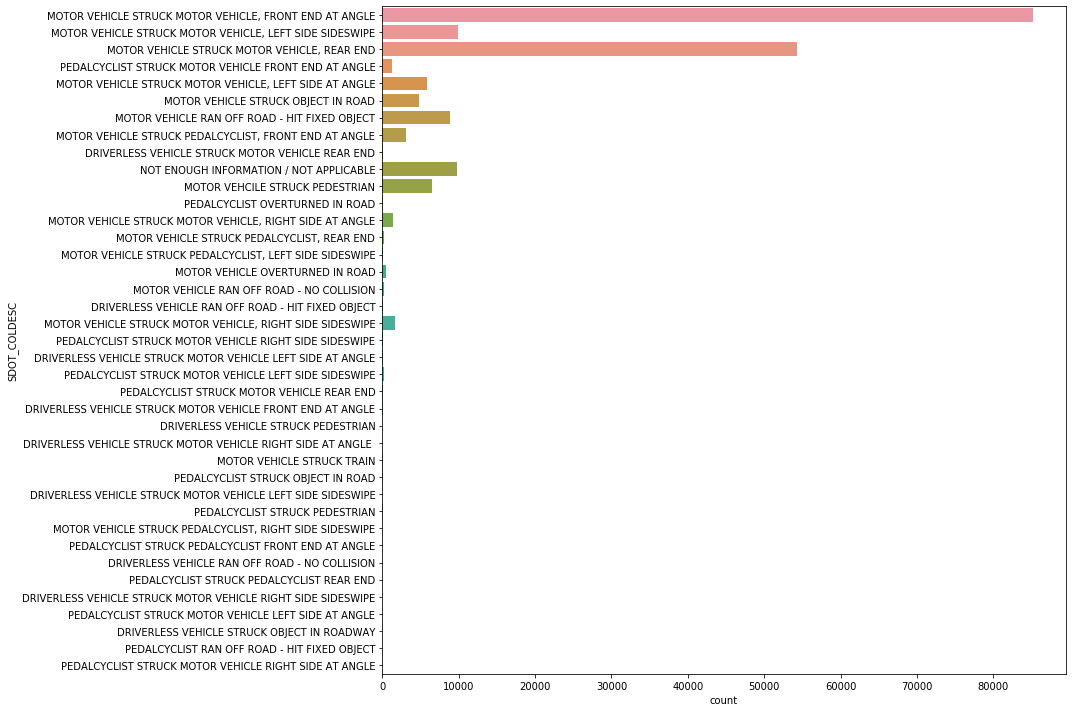

In [98]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(111)
sns.countplot(y='SDOT_COLDESC', data=df_drop)
plt.tight_layout()
plt.show()

In [99]:
df_drop['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [100]:
df_drop['SDOT_COLDESC'].nunique()

39

As observed from the above graph and the list of options that SDOT_COLDESC might take, the SDOT_COLDESC must be re-classified.

In [110]:
# DRIVERLESS vehicles will be grouped unded a unique value - "DRIVERLESS VEHICLE ACCIDENT". Due to fact that driverless accidents
# are so few in numbers, merging these obs with MOTOR VEHICLE will not influence at all. However, keep it as a separate class
# there maybe some usefull insights obtained from such classification.

df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK PEDESTRIAN', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'
df_drop.loc[df_drop['SDOT_COLDESC'] =='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE ', 'SDOT_COLDESC'] = 'DRIVERLESS VEHICLE AT FAUL'


# PEDALCYCLIST values will be classified under a singular value. The logic remains the same as with DRIVERLESS.

df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT ANGLE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK PEDALCYCLIST REAR END', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK PEDALCYCLIST REAR END', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK OBJECT IN ROAD', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST OVERTURNED IN ROAD', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK PEDESTRIAN', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'
df_drop.loc[df_drop['SDOT_COLDESC'] =='PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE', 'SDOT_COLDESC'] = 'PEDALCICLIST AT FAULT'

# MOTOR VEHICLE strucking a PEDALCYCLIST will be grouped under a single class.
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST'


In [111]:
df_drop['SDOT_COLDESC'].nunique()

16

In [112]:
df_drop['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE      85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE      9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                      9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                8856
MOTOR VEHCILE STRUCK PEDESTRIAN                              6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE       5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                          4741
MOTOR VEHICLE STRUCK AT PEDALCYCLIST                         3426
PEDALCICLIST AT FAULT                                        1875
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE     1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE      1440
MOTOR VEHICLE OVERTURNED IN ROAD                              479
DRIVERLESS VEHICLE AT FAUL                                    391
MOTOR VEHICLE RAN OFF ROAD - NO COLLISION                     166
MOTOR VEHI

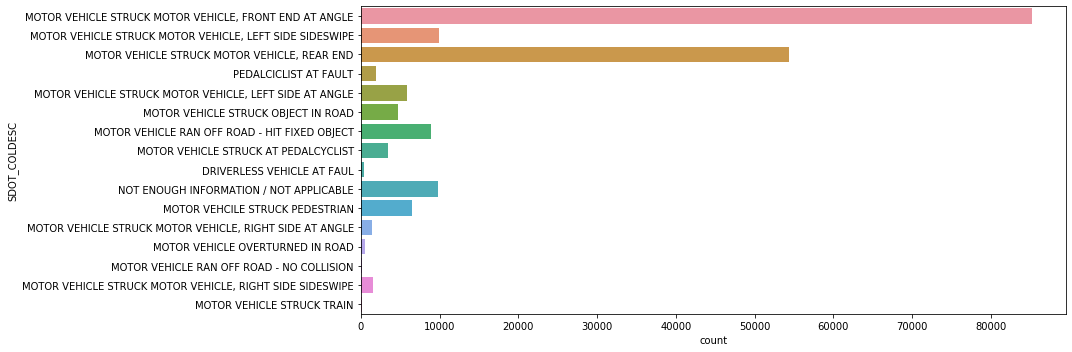

In [113]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(111)
sns.countplot(y='SDOT_COLDESC', data=df_drop)
plt.tight_layout()
plt.show()

Ffrom the graph above, can be observed that "MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE" and "MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END" group of accidents dominates the kind of accidents. 
Grouping toghether "MOTOR VEHICLE STRUCK AT PEDALCYCLIST" and "MOTOR VEHCILE STRUCK PEDESTRIAN" under a single group it would be the 3rd most often accidents registered. Since, PEDALCYCLIST and PEDESTRIANS are going to be treated as a single group, these categories will be grouped under a single category.
"MOTOR VEHICLE STRUCK TRAIN", "MOTOR VEHICLE RAN OFF ROAD - NO COLLISION", and "MOTOR VEHICLE OVERTURNED IN ROAD"  will be grouped under the "NOT ENOUGH INFORMATION / NOT APPLICABLE" since there are too few observations for this categories to extract some reliable inteligence.

In [114]:
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK AT PEDALCYCLIST', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST OR PEDESTRIAN'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHCILE STRUCK PEDESTRIAN', 'SDOT_COLDESC'] = 'MOTOR VEHICLE STRUCK PEDALCYCLIST OR PEDESTRIAN'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE STRUCK TRAIN', 'SDOT_COLDESC'] = 'NOT ENOUGH INFORMATION / NOT APPLICABLE'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE RAN OFF ROAD - NO COLLISION', 'SDOT_COLDESC'] = 'NOT ENOUGH INFORMATION / NOT APPLICABLE'
df_drop.loc[df_drop['SDOT_COLDESC'] =='MOTOR VEHICLE OVERTURNED IN ROAD', 'SDOT_COLDESC'] = 'NOT ENOUGH INFORMATION / NOT APPLICABLE'

In [115]:
df_drop['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE      85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                54299
NOT ENOUGH INFORMATION / NOT APPLICABLE                     10534
MOTOR VEHICLE STRUCK PEDALCYCLIST OR PEDESTRIAN              9944
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE      9928
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                8856
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE       5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                          4741
PEDALCICLIST AT FAULT                                        1875
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE     1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE      1440
DRIVERLESS VEHICLE AT FAUL                                    391
Name: SDOT_COLDESC, dtype: int64

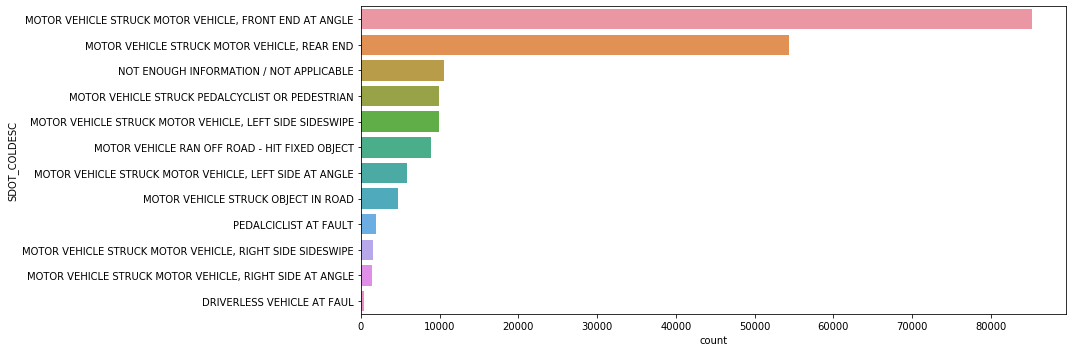

In [212]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(111)
order0=df_drop['SDOT_COLDESC'].value_counts(ascending=False).index
sns.countplot(y='SDOT_COLDESC', data=df_drop, order=order0)
plt.tight_layout()
plt.show()

Next variables that are going to be graphically reviewed are "ROADCOND", "LIGHTCOND", and "WEATHER".

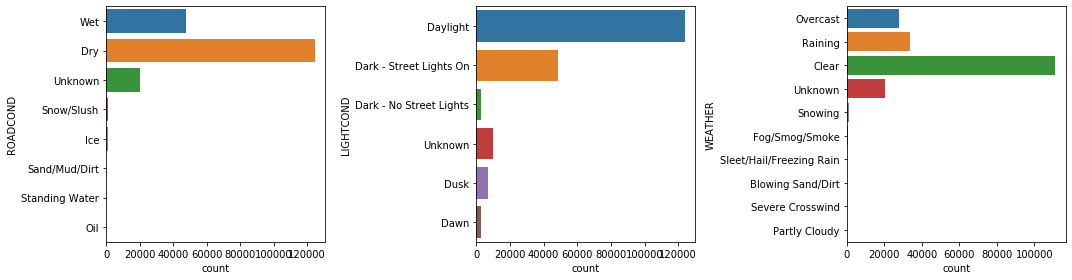

In [117]:
fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot(131)
sns.countplot(y='ROADCOND', data=df_drop)
ax2 = plt.subplot(132)
sns.countplot(y='LIGHTCOND', data=df_drop)
ax3 = plt.subplot(133)
sns.countplot(y='WEATHER', data=df_drop)
plt.tight_layout()
plt.show()

Under the ROADCOND options 'Snow/Slush', 'Ice', 'Standing Water', and 'Oil' will go under 'Wet' category, 'Sand/Mud/Dirt' goes under 'Unknown'.
Under the LIGHTCOND options 'Dawn' and 'Dusk' will be merged under 'Dark - No Street Lights'.
Under the WEATHER options 'Snowing', 'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt', 'Severe Crosswind' and 'Partly Cloudy' classified under 'Unknown' category since the frequency of a such records has a very insignificant impact to be considered.

In [120]:
# ROADCOND
df_drop.loc[df_drop['ROADCOND'] =='Snow/Slush', 'ROADCOND'] = 'Wet'
df_drop.loc[df_drop['ROADCOND'] =='Ice', 'ROADCOND'] = 'Wet'
df_drop.loc[df_drop['ROADCOND'] =='Standing Water', 'ROADCOND'] = 'Wet'
df_drop.loc[df_drop['ROADCOND'] =='Oil', 'ROADCOND'] = 'Wet'
df_drop.loc[df_drop['ROADCOND'] =='Sand/Mud/Dirt', 'ROADCOND'] = 'Unknown'

# LIGHTCOND
df_drop.loc[df_drop['LIGHTCOND'] =='Dawn', 'LIGHTCOND'] = 'Dark - No Street Lights'
df_drop.loc[df_drop['LIGHTCOND'] =='Dusk', 'LIGHTCOND'] = 'Dark - No Street Lights'

# WEATHER
df_drop.loc[df_drop['WEATHER'] =='Snowing', 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['WEATHER'] =='Sleet/Hail/Freezing Rain', 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['WEATHER'] =='Fog/Smog/Smoke', 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['WEATHER'] == 'Blowing Sand/Dirt', 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['WEATHER'] == 'Severe Crosswind', 'WEATHER'] = 'Unknown'
df_drop.loc[df_drop['WEATHER'] == 'Partly Cloudy', 'WEATHER'] = 'Unknown'

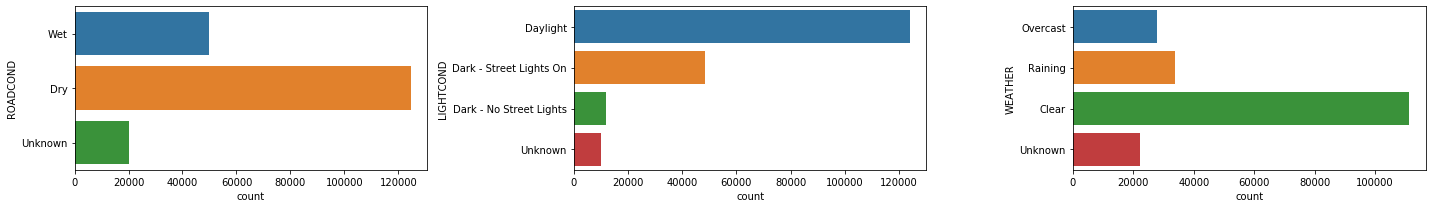

In [122]:
fig = plt.figure(figsize=(20,3))
ax1 = plt.subplot(131)
sns.countplot(y='ROADCOND', data=df_drop)
ax2 = plt.subplot(132)
sns.countplot(y='LIGHTCOND', data=df_drop)
ax3 = plt.subplot(133)
sns.countplot(y='WEATHER', data=df_drop)
plt.tight_layout()
plt.show()

It can be observed that most accidents are happens under 'Dry' roadconditions, during the 'Daylight', in a 'Clear' weather. This might be due to the fact that drivers are overconfident and paying less attention to the road. On another hand, during the bad weather/lightcondition/roadcondition there are less participants on the traffic.

Time related insights should be extracted out of 'TIME', 'WKDAY', 'MONTH' columns.

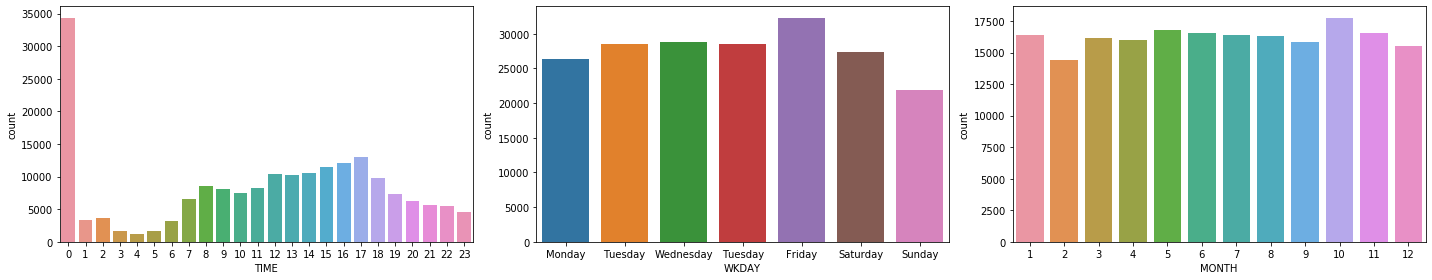

In [123]:
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(131)
sns.countplot(df_drop['TIME'])
ax2 = plt.subplot(132)
sns.countplot(df_drop['WKDAY'], order=['Monday', 'Tuesday','Wednesday','Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax3 = plt.subplot(133)
sns.countplot(df_drop['MONTH'])
plt.tight_layout()
plt.show()

Most accidets, as expected, are registered during the peak hours (between 15 and 17). Overall, during the week the number of accidents are relatively equally distributed, although on Friday there are the most accidents that happens and on Sunday the least amount of accidents happens. As of 'MONTH' of the year there are not much differences in the number of accidents. It can be observed that the most amount of accidents, although not by much, happens in Oct. A higher number for Octomber probably is due to the fact that weather/road conditions is changing and requires a certain adaptability of the drivers. For February, the least amount of accidents, which is probably because Feb is a short month. 

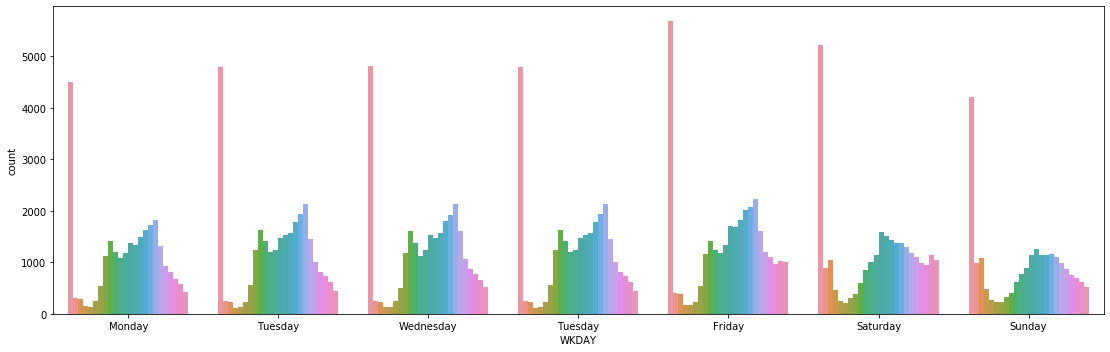

In [124]:
fig = plt.figure(figsize=(45,5))
ax1 = plt.subplot(131)
sns.countplot(x="WKDAY", hue="TIME", data=df_drop, order=['Monday', 'Tuesday','Wednesday','Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1.legend().set_visible(False)
plt.tight_layout()
plt.show()

While during the week the most accidents happens during the peak hours, on weekends the most accidents happens around noon.

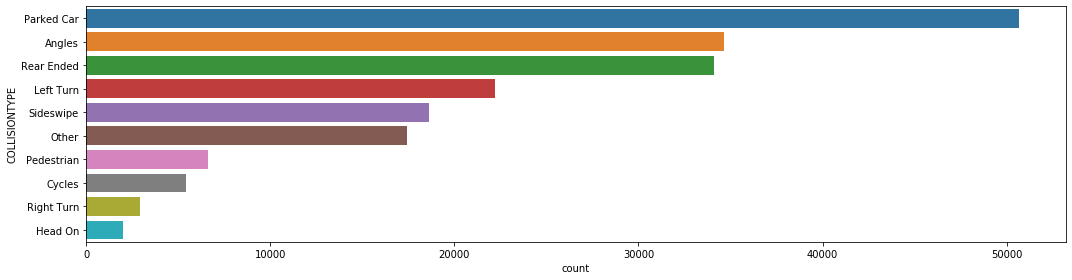

In [143]:
fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot(111)
order = df_drop['COLLISIONTYPE'].value_counts(ascending=False).index
sns.countplot(y='COLLISIONTYPE', data=df_drop, order=order)
plt.tight_layout()
plt.show()

In [194]:
df_drop['COLLISIONTYPE'].value_counts(ascending=False, normalize=True)

Parked Car    0.260283
Angles        0.178114
Rear Ended    0.175114
Left Turn     0.114084
Sideswipe     0.095591
Other         0.089473
Pedestrian    0.033944
Cycles        0.027816
Right Turn    0.015184
Head On       0.010397
Name: COLLISIONTYPE, dtype: float64

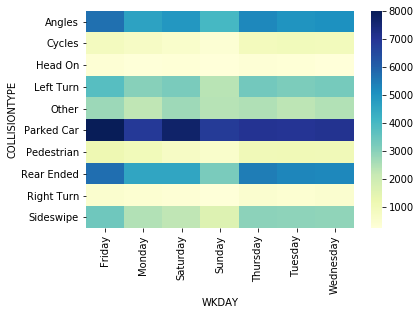

In [216]:
sns.heatmap(pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['WKDAY']),cmap="YlGnBu", cbar=True)

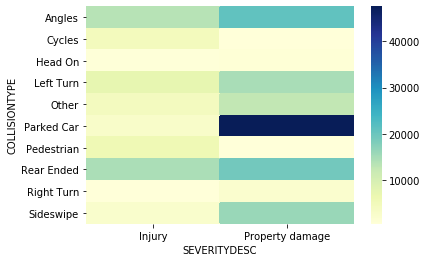

In [193]:
sns.heatmap(pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['SEVERITYDESC']),cmap="YlGnBu", cbar=True)

'Parked Car' related accidentsm (26%) dominates by a significant amount other type of accidents. Next most frequent types of accidents being 'Angles' (18%) and 'Rear Ended' (18%), which are having relatively about the same frequency of occurency. However, 'Parked Car' related accidents are among the least categories of accidets that results in 'Injury' (1.6%), from accident severity perspective, while other two types of accidents mentioned above are leading the the 'Injury' category (about 7% each). Another observation to mention is the fact that the frequency of occurancy of all three types of accidents mentioned here registers the highest amount on Friday and Saturday.

In [195]:
pd.crosstab(df_drop['COLLISIONTYPE'], df_drop['SEVERITYDESC'], normalize=True)

SEVERITYDESC,Injury,Property damage
COLLISIONTYPE,,
Angles,0.069984,0.108130
Cycles,0.024369,0.003447
Head On,0.004479,0.005918
Left Turn,0.038233,0.075850
Other,0.023840,0.065633
Parked Car,0.016140,0.244143
Pedestrian,0.030492,0.003452
Rear Ended,0.075362,0.099752
Right Turn,0.003128,0.012056


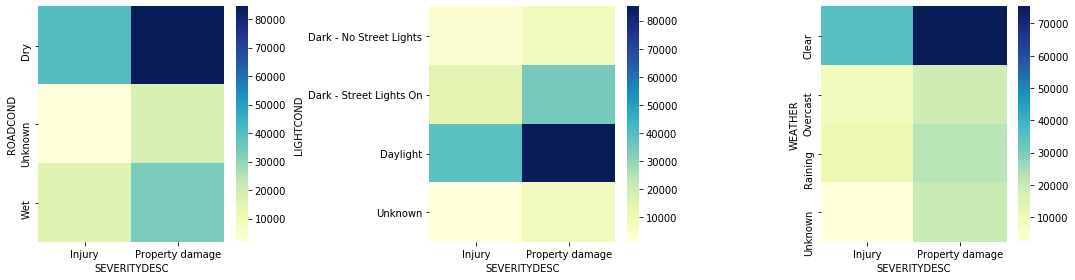

In [198]:
fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot(131)
sns.heatmap(pd.crosstab(df_drop['ROADCOND'], df_drop['SEVERITYDESC']),cmap="YlGnBu", cbar=True)
ax2 = plt.subplot(132)
sns.heatmap(pd.crosstab(df_drop['LIGHTCOND'], df_drop['SEVERITYDESC']),cmap="YlGnBu", cbar=True)
ax3 = plt.subplot(133)
sns.heatmap(pd.crosstab(df_drop['WEATHER'], df_drop['SEVERITYDESC']),cmap="YlGnBu", cbar=True)
plt.tight_layout()
plt.show()

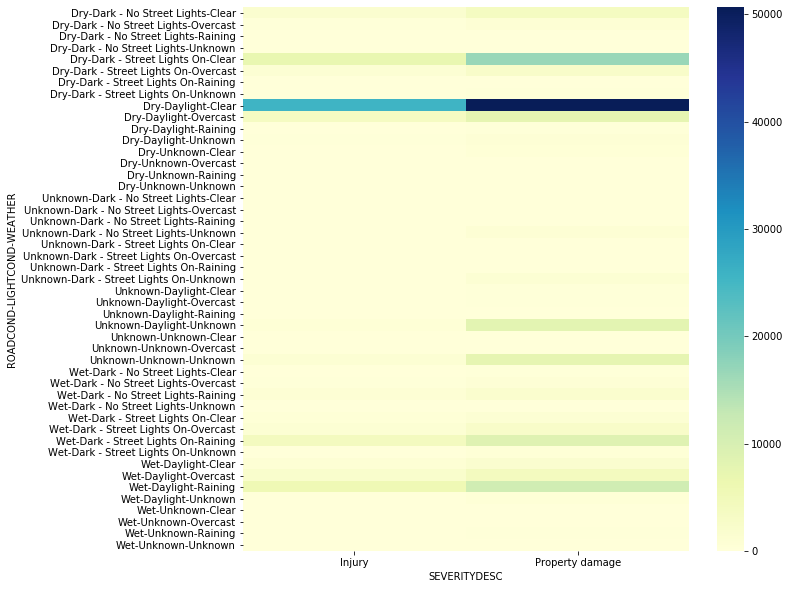

In [226]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
sns.heatmap(pd.crosstab([df_drop['ROADCOND'],df_drop['LIGHTCOND'],df_drop['WEATHER']], df_drop['SEVERITYDESC']),cmap="YlGnBu", cbar=True)

In [211]:
pd.crosstab([df_drop['ROADCOND'],df_drop['LIGHTCOND'],df_drop['WEATHER']], df_drop['SEVERITYDESC'])

SEVERITYDESC                               Injury  Property damage
ROADCOND LIGHTCOND               WEATHER                          
Dry      Dark - No Street Lights Clear       1647             3766
                                 Overcast     363              829
                                 Raining       14               32
                                 Unknown       35              122
         Dark - Street Lights On Clear       7070            16755
                                 Overcast    1095             2578
                                 Raining       80              188
                                 Unknown      116              302
         Daylight                Clear      25565            50679
                                 Overcast    3677             7536
                                 Raining      107              215
                                 Unknown      199              621
         Unknown                 Clear         71              593
                                 Overcast      13               90
                                 Raining        3                2
                                 Unknown        9              138
Unknown  Dark - No Street Lights Clear          9               39
                                 Overcast       4               36
                                 Raining        0                1
                                 Unknown       72              960
         Dark - Street Lights On Clear         24               87
                                 Overcast      20               82
                                 Raining        1                3
                                 Unknown       66              995
         Daylight                Clear         69              366
                                 Overcast      39              211
                                 Raining        2                4
                                 Unknown      404             7977
         Unknown                 Clear          1               32
                                 Overcast       1               17
                                 Unknown     1147             7565
Wet      Dark - No Street Lights Clear         98              210
                                 Overcast     329              685
                                 Raining      888             1803
                                 Unknown       31              114
         Dark - Street Lights On Clear        427             1108
                                 Overcast    1120             2650
                                 Raining     4310             8781
                                 Unknown      146              503
         Daylight                Clear        851             1639
                                 Overcast    2072             4208
                                 Raining     5827            11153
                                 Unknown       94              447
         Unknown                 Clear          8               21
                                 Overcast      12               47
                                 Raining       47              202
                                 Unknown        5               93

Surprisingly, the most amount of accidents resulting in injuries (13%) happens in a dry road condition, under good visability and clear weather. The same conclusion  regarding the dry road condition, good visability, adn clear weather, holds true and for the accidents resulting in property damages only (26%). I would assume that overconfidence of the drivers in their driving skills affects negatively the safety on public roads.

In [238]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LOG            189339 non-null  float64
 1   LAT            189339 non-null  float64
 2   ADDRTYPE       194673 non-null  object 
 3   LOCATION       194673 non-null  object 
 4   SEVERITYDESC   194673 non-null  object 
 5   COLLISIONTYPE  194673 non-null  object 
 6   PERSONCOUNT    194673 non-null  int64  
 7   VEHCOUNT       194673 non-null  int64  
 8   INCDTTM        194673 non-null  object 
 9   JUNCTIONTYPE   194673 non-null  object 
 10  SDOT_COLDESC   194673 non-null  object 
 11  UNDERINFL      194673 non-null  object 
 12  WEATHER        194673 non-null  object 
 13  ROADCOND       194673 non-null  object 
 14  LIGHTCOND      194673 non-null  object 
 15  SPEEDING       194673 non-null  object 
 16  NONVEH         194673 non-null  int64  
 17  DATE           194673 non-nul

In [239]:
# Defining the feature matrix
df_prep = df_drop.drop(columns=['LOG','LAT','LOCATION','INCDTTM'],axis=1)

In [240]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       194673 non-null  object
 1   SEVERITYDESC   194673 non-null  object
 2   COLLISIONTYPE  194673 non-null  object
 3   PERSONCOUNT    194673 non-null  int64 
 4   VEHCOUNT       194673 non-null  int64 
 5   JUNCTIONTYPE   194673 non-null  object
 6   SDOT_COLDESC   194673 non-null  object
 7   UNDERINFL      194673 non-null  object
 8   WEATHER        194673 non-null  object
 9   ROADCOND       194673 non-null  object
 10  LIGHTCOND      194673 non-null  object
 11  SPEEDING       194673 non-null  object
 12  NONVEH         194673 non-null  int64 
 13  DATE           194673 non-null  object
 14  MONTH          194673 non-null  int64 
 15  TIME           194673 non-null  int64 
 16  WKDAY          194673 non-null  object
dtypes: int64(5), object(12)
memory usage: 25.2+ MB


In [242]:
df_prep.to_csv("DataPreped.csv")

In [243]:
df_prep.columns

Index(['ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'NONVEH', 'DATE', 'MONTH', 'TIME', 'WKDAY'],
      dtype='object')